In [1]:
!pip install kora -q
!pip install selenium

     |████████████████████████████████| 57 kB 1.6 MB/s 
     |████████████████████████████████| 1.6 MB 3.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 995 kB 2.4 MB/s 
     |████████████████████████████████| 384 kB 33.2 MB/s 
     |████████████████████████████████| 140 kB 36.6 MB/s 
     |████████████████████████████████| 58 kB 3.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


In [2]:
from kora.selenium import wd as browser
from selenium.webdriver.common.by import By
import pandas as pd 
import time
from datetime import date,datetime as dt
import datetime
from bs4 import BeautifulSoup
import numpy as np
import re 
from datetime import  timedelta

In [3]:
flipkart = []

In [4]:
for i in range(1,100):
    url=f"https://www.flipkart.com/realme-narzo-50i-carbon-black-64-gb/product-reviews/itm53fa214c23501?pid=MOBG6MY4ZDGGZ8Q9&lid=LSTMOBG6MY4ZDGGZ8Q9KSLJZG&marketplace=FLIPKART&page={i}"
    browser.get(url)
    xx= browser.find_elements(By.XPATH,"//span[@class='_1BWGvX']")
    def click(p):
        try:
            p.click()
        except:
            pass
  
    d_x=[click(x) for x in xx]
    containers=[x.get_attribute('innerHTML') for x in browser.find_elements(By.XPATH,'//div[@class="col _2wzgFH K0kLPL"]')]

    for container in containers:
        rev1=dict()
        bsObj=BeautifulSoup(container)
        review=bsObj.find('p').text
        print(review)
     
        rev=bsObj.find('div',attrs={"class":"t-ZTKy"}).text.strip()
        print(rev)
        
        try:
            try:
                rating=bsObj.find('div',attrs={"class":"_3LWZlK _1BLPMq"}).text.strip()
                rating=int(float(rating[0]))
            except:
                rating=bsObj.find('div',attrs={"class":"_3LWZlK _32lA32 _1BLPMq"}).text.strip()
                rating=int(float(rating[0]))
        except:
            rating=bsObj.find('div',attrs={"class":"_3LWZlK _1rdVr6 _1BLPMq"}).text.strip()
            rating=int(float(rating[0]))
            
    
        rev1["rating"]=rating
        rev1["review"]=review+" "+rev
        flipkart.append(rev1)

Mind-blowing purchase
Realme Narzo 50i Is very nice phone I have used this 5 days ago it's perfomance is very good.1.Battery perfomance is very we can use this for 15-16 hours.2.Camera perfomance is not so good but rear camera is good.3.The charger is very fast it can charge phone in 1 hour.So If you want to buy new phone so you can buy this.READ MORE
Could be way better
Camera quality is not good front and back All other thinks good ,call recording system is not good it doesn't showing recorded voice call in recording app but shows in dial section where easily any one can reachREAD MORE
Awesome
Amazing and good price this is one of best mobile and battery is very good 3 days it will come fast charge and one of best to purchase this mobile and is too big mobile and worth for money and best mobile by real me good priceREAD MORE
Excellent
This phone is use to very handy and snapy camera quality is very nice i really love this product very nice product to use price worthyREAD MORE
Did not

In [5]:
flipkart_reviews = pd.DataFrame(flipkart)

In [6]:
flipkart_reviews

,rating,review
0,5,Mind-blowing purchase Realme Narzo 50i Is very...
1,2,Could be way better Camera quality is not good...
2,5,Awesome Amazing and good price this is one of ...
3,5,Excellent This phone is use to very handy and ...
4,1,Did not meet expectations My Personal experien...
...,...,...
983,5,Must buy! AwesomeREAD MORE
984,4,Worth the money Nice phoneREAD MORE
985,5,Best in the market! This mobile is very good 👍...
986,3,Good Value of money the best prizeREAD MORE


In [7]:
flipkart_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  988 non-null    int64 
 1   review  988 non-null    object
dtypes: int64(1), object(1)
memory usage: 15.6+ KB


In [8]:
flipkart_reviews.to_csv(r'Flipkart.csv', index= False, header=True)

##WordClouds and EDA

In [9]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Count')

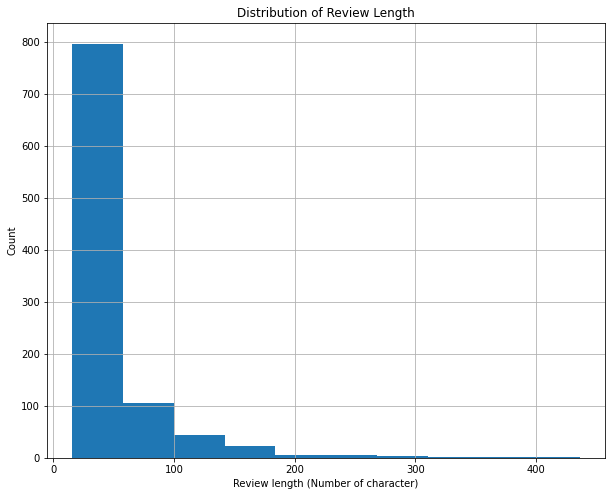

In [10]:
# Plot distribution of review length
review_length = flipkart_reviews["review"].dropna().map(lambda x: len(x))
plt.figure(figsize=(10,8))
review_length.loc[review_length < 1500].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

In [11]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [12]:
wc = WordCloud(width=1200, height=800, max_words=200, stopwords=STOPWORDS)

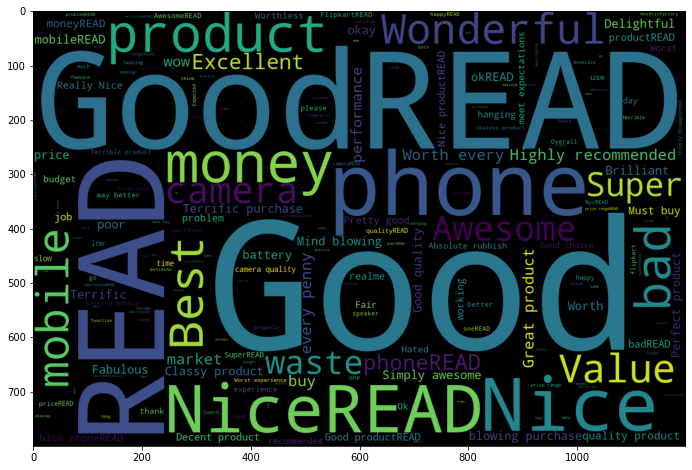

In [13]:
plt.figure(figsize = (12,8))
plt.imshow(wc.generate_from_text(" ".join(flipkart_reviews.review)))
plt.show()

In [14]:
tf = CountVectorizer(token_pattern = "[a-z']+", max_df = 0.6, min_df=10, stop_words =STOPWORDS)

In [15]:
tf_mat = tf.fit_transform(flipkart_reviews.review)
tf_mat


<988x86 sparse matrix of type '<class 'numpy.int64'>'
	with 3389 stored elements in Compressed Sparse Row format>

In [16]:
tf.vocabulary_

{'mind': 37,
 'blowing': 9,
 'purchase': 60,
 'realme': 66,
 'nice': 43,
 'phone': 51,
 'good': 26,
 'battery': 6,
 'use': 75,
 'camera': 13,
 'buy': 12,
 'read': 64,
 'way': 79,
 'better': 8,
 'quality': 61,
 'awesome': 1,
 'price': 55,
 'best': 7,
 'mobile': 38,
 'worth': 83,
 'money': 40,
 'priceread': 56,
 'excellent': 20,
 'really': 65,
 'product': 58,
 'meet': 36,
 'expectations': 21,
 'experience': 22,
 'every': 19,
 'time': 74,
 'hanging': 29,
 'worst': 82,
 'must': 42,
 'terrific': 73,
 'goodread': 27,
 'qualityread': 62,
 'classy': 15,
 'mobileread': 39,
 'market': 35,
 'great': 28,
 'budget': 11,
 'fabulous': 23,
 'productread': 59,
 'wonderful': 80,
 'highly': 32,
 'recommended': 67,
 'job': 33,
 'superread': 72,
 'simply': 69,
 'brilliant': 10,
 'super': 71,
 'wow': 85,
 'delightful': 17,
 'backup': 3,
 'slow': 70,
 'waste': 78,
 'niceread': 44,
 'perfect': 49,
 'flipkartread': 25,
 'bad': 4,
 'disappointed': 18,
 'low': 34,
 'okay': 46,
 'performance': 50,
 'absolute': 0,

In [17]:
tf_vocab_reverse = {v:k for k,v in tf.vocabulary_.items()}
tf_vocab_reverse

{37: 'mind',
 9: 'blowing',
 60: 'purchase',
 66: 'realme',
 43: 'nice',
 51: 'phone',
 26: 'good',
 6: 'battery',
 75: 'use',
 13: 'camera',
 12: 'buy',
 64: 'read',
 79: 'way',
 8: 'better',
 61: 'quality',
 1: 'awesome',
 55: 'price',
 7: 'best',
 38: 'mobile',
 83: 'worth',
 40: 'money',
 56: 'priceread',
 20: 'excellent',
 65: 'really',
 58: 'product',
 36: 'meet',
 21: 'expectations',
 22: 'experience',
 19: 'every',
 74: 'time',
 29: 'hanging',
 82: 'worst',
 42: 'must',
 73: 'terrific',
 27: 'goodread',
 62: 'qualityread',
 15: 'classy',
 39: 'mobileread',
 35: 'market',
 28: 'great',
 11: 'budget',
 23: 'fabulous',
 59: 'productread',
 80: 'wonderful',
 32: 'highly',
 67: 'recommended',
 33: 'job',
 72: 'superread',
 69: 'simply',
 10: 'brilliant',
 71: 'super',
 85: 'wow',
 17: 'delightful',
 3: 'backup',
 70: 'slow',
 78: 'waste',
 44: 'niceread',
 49: 'perfect',
 25: 'flipkartread',
 4: 'bad',
 18: 'disappointed',
 34: 'low',
 46: 'okay',
 50: 'performance',
 0: 'absolute',

#Analyzing using TFIDF

In [18]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import cohen_kappa_score

In [19]:
data_1 = flipkart_reviews[~flipkart_reviews['review'].isnull()]
data_1.shape

(988, 2)

In [20]:
data_1.rating.value_counts()

5    517
4    179
1    139
3    110
2     43
Name: rating, dtype: int64

In [21]:
train_data = data_1.iloc[:693]
test_data = data_1.iloc[694:]

In [22]:
(train_data.shape, test_data.shape)

((693, 2), (294, 2))

In [23]:
x_train, x_val, y_train, y_val = train_test_split(train_data.iloc[:,1:],
                                                  train_data.iloc[:,0],
                                                  test_size=0.4,
                                                  random_state = 123456)

In [24]:
x_train.shape

(415, 1)

In [25]:
from wordcloud import STOPWORDS

In [26]:
tfidf = TfidfVectorizer(stop_words=STOPWORDS, token_pattern="[a-z']+", 
                        max_df=0.55, min_df=10)

In [27]:
tfidf_mat_train = tfidf.fit_transform(x_train['review'])
tfidf_mat_val = tfidf.transform(x_val['review'])
tfidf_mat_test = tfidf.transform(test_data['review'])

In [28]:
lr_model_1 = LogisticRegression()
lr_model_1.fit(X=tfidf_mat_train, y=y_train)

LogisticRegression()

In [29]:
pred_val_lr = lr_model_1.predict(tfidf_mat_val)
cohen_kappa_score(pred_val_lr, y_val)

0.5433375205333849

In [30]:
N =40
svd = TruncatedSVD(n_components=N)
svd_mat_train = svd.fit_transform(tfidf_mat_train)
svd_mat_val = svd.transform(tfidf_mat_val)
svd_mat_test = svd.transform(tfidf_mat_test)

In [31]:
lr_model_2 = LogisticRegression()
lr_model_2.fit(X=svd_mat_train, y=y_train)
pred_val_lr2 = lr_model_2.predict(svd_mat_val)
cohen_kappa_score(pred_val_lr2, y_val)

0.5365323282110757

In [32]:
gbm = GradientBoostingClassifier(learning_rate=0.01, 
                                 n_estimators=2000, max_depth=1)

In [33]:
gbm_1 = gbm.fit(X=svd_mat_train, y=y_train)
pred_val_gbm1 = gbm_1.predict(svd_mat_val)
cohen_kappa_score(pred_val_gbm1, y_val)

0.6179924852388621

##SPACY

In [34]:
import spacy
import pandas as pd
import numpy as np

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [35]:
!python -m spacy download en_core_web_lg

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
2022-09-30 00:18:23.768543: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 8.4 kB/s 
     |████████████████████████████████| 127 kB 2.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.12
    Uninstalling urllib3-1.26.12:
      Successfully uninstalled urllib3-1.26.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.5.0 requires urllib3[socks]~=1.26, but you have urllib3 1.25.11 which is incompatib

In [36]:
nlp = spacy.load('en_core_web_lg')

In [37]:
fp_rev = flipkart_reviews.iloc[0,:]["review"]

In [38]:
texts = nlp(fp_rev)

In [39]:
for token in texts[:1000]:
  print(token.text, token.pos_)

Mind NOUN
- PUNCT
blowing VERB
purchase NOUN
Realme PROPN
Narzo PROPN
50i NUM
Is AUX
very ADV
nice ADJ
phone NOUN
I PRON
have AUX
used VERB
this DET
5 NUM
days NOUN
ago ADV
it PRON
's AUX
perfomance NOUN
is AUX
very ADV
good.1.Battery PROPN
perfomance NOUN
is AUX
very ADV
we PRON
can AUX
use VERB
this PRON
for ADP
15 NUM
- SYM
16 NUM
hours.2.Camera NOUN
perfomance NOUN
is AUX
not PART
so ADV
good ADJ
but CCONJ
rear ADJ
camera NOUN
is AUX
good.3.The DET
charger NOUN
is AUX
very ADV
fast ADJ
it PRON
can AUX
charge VERB
phone NOUN
in ADP
1 NUM
hour NOUN
. PUNCT
So ADV
If SCONJ
you PRON
want VERB
to PART
buy VERB
new ADJ
phone NOUN
so SCONJ
you PRON
can AUX
buy VERB
this PRON
. PUNCT
READ VERB
MORE ADJ


In [40]:
list(texts.noun_chunks)[:100]

[Mind-blowing purchase Realme Narzo,
 very nice phone,
 I,
 it,
 perfomance,
 very good.1.Battery perfomance,
 we,
 this,
 15-16 hours.2.Camera perfomance,
 so good but rear camera,
 good.3.The charger,
 it,
 phone,
 1 hour,
 you,
 new phone,
 you,
 this]

In [41]:
for ent in texts.ents:
  print(ent.text, ent.label_)

Realme Narzo 50i PRODUCT
this 5 days ago DATE
15-16 CARDINAL
1 hour TIME


In [42]:
#To find dependencies (Dependency Parsing)

for token in texts:
  if token.ent_type_ == 'ORG':
    txt = " ".join([i.text for i in token.subtree])
    if txt !=token.text:
      print(token.text, token.dep_, " ".join([i.text for i in token.subtree]))


In [43]:
from spacy import displacy

In [44]:
sent1 = list(texts.sents)
sent1

[Mind-blowing purchase Realme Narzo 50i Is very nice phone I have used this 5 days ago it's perfomance is very good.1.Battery perfomance is very we can use this for 15-16 hours.2.Camera perfomance is not so good but rear camera is good.3.The charger is very fast it can charge phone in 1 hour.,
 So If you want to buy new phone so you can buy this.,
 READ MORE]

In [45]:
displacy.render(sent1, jupyter = True)

##Entity Recognizer

In [46]:
data = flipkart_reviews['review'].values.tolist()

str=''
for i in data:
  #print(i)
  str=str+''.join(i)
  str=str.lower()
str

"mind-blowing purchase realme narzo 50i is very nice phone i have used this 5 days ago it's perfomance is very good.1.battery perfomance is very we can use this for 15-16 hours.2.camera perfomance is not so good but rear camera is good.3.the charger is very fast it can charge phone in 1 hour.so if you want to buy new phone so you can buy this.read morecould be way better camera quality is not good front and back all other thinks good ,call recording system is not good it doesn't showing recorded voice call in recording app but shows in dial section where easily any one can reachread moreawesome amazing and good price this is one of best mobile and battery is very good 3 days it will come fast charge and one of best to purchase this mobile and is too big mobile and worth for money and best mobile by real me good priceread moreexcellent this phone is use to very handy and snapy camera quality is very nice i really love this product very nice product to use price worthyread moredid not me

In [47]:
sent2 = nlp(str)
sent2.user_data["title"] = "Entity Recognizer"
displacy.render(sent2, style="ent", jupyter=True)

In [48]:
def ent_relation(txt):
  output = []
  doc = nlp(txt)
  for token in doc:
    if token.dep_ == 'nsubj':
      words = [w for w in token.head.rights]
      for wo in words:
        if wo.dep_ in ['acomp', 'amod']:
          output.append((token.orth_, ' '.join([w.text for w in wo.subtree])))
  return(output)

In [49]:
ent_relation(texts)

[('charger', 'very fast')]

##GENSIM

In [50]:
import gensim

In [51]:
flipkart_reviews

,rating,review
0,5,Mind-blowing purchase Realme Narzo 50i Is very...
1,2,Could be way better Camera quality is not good...
2,5,Awesome Amazing and good price this is one of ...
3,5,Excellent This phone is use to very handy and ...
4,1,Did not meet expectations My Personal experien...
...,...,...
983,5,Must buy! AwesomeREAD MORE
984,4,Worth the money Nice phoneREAD MORE
985,5,Best in the market! This mobile is very good 👍...
986,3,Good Value of money the best prizeREAD MORE


In [52]:
only_reviews = flipkart_reviews.review

In [53]:
only_reviews1 = [gensim.utils.any2utf8(rev.lower()) for rev in only_reviews]

In [54]:
only_reviews1 = [gensim.parsing.remove_stopwords(rev) for rev in only_reviews1]

In [55]:
tokens = [list(gensim.utils.tokenize(rev)) for rev in only_reviews1]
tokens

[['mind',
  'blowing',
  'purchase',
  'realme',
  'narzo',
  'i',
  'nice',
  'phone',
  'days',
  'ago',
  'it',
  's',
  'perfomance',
  'good',
  'battery',
  'perfomance',
  'use',
  'hours',
  'camera',
  'perfomance',
  'good',
  'rear',
  'camera',
  'good',
  'the',
  'charger',
  'fast',
  'charge',
  'phone',
  'hour',
  'so',
  'want',
  'buy',
  'new',
  'phone',
  'buy',
  'this',
  'read'],
 ['way',
  'better',
  'camera',
  'quality',
  'good',
  'thinks',
  'good',
  'call',
  'recording',
  'good',
  'doesn',
  't',
  'showing',
  'recorded',
  'voice',
  'recording',
  'app',
  'shows',
  'dial',
  'section',
  'easily',
  'reachread'],
 ['awesome',
  'amazing',
  'good',
  'price',
  'best',
  'mobile',
  'battery',
  'good',
  'days',
  'come',
  'fast',
  'charge',
  'best',
  'purchase',
  'mobile',
  'big',
  'mobile',
  'worth',
  'money',
  'best',
  'mobile',
  'real',
  'good',
  'priceread'],
 ['excellent',
  'phone',
  'use',
  'handy',
  'snapy',
  'camer

In [56]:
# Create Dictionary
id2word = gensim.corpora.Dictionary(tokens)

# Create Corpus
texts = tokens

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [57]:
dictionary = gensim.corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [58]:
params={'alpha': 0.1, 'eta': 0.1, 'num_topics': 10,'corpus':corpus,'id2word':id2word}
lda_model = gensim.models.LdaMulticore(random_state=100, chunksize=1500, passes=200,**params)
                                       

In [59]:
from pprint import pprint

In [60]:
# Print the Keyword in the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.144*"purchase" + 0.124*"terrific" + 0.064*"mind" + 0.062*"blowing" + '
  '0.038*"goodread" + 0.022*"good" + 0.019*"buy" + 0.018*"happyread" + '
  '0.015*"i" + 0.015*"it"'),
 (1,
  '0.144*"niceread" + 0.109*"best" + 0.074*"recommended" + 0.062*"phoneread" + '
  '0.057*"highly" + 0.054*"nice" + 0.054*"market" + 0.037*"delightful" + '
  '0.036*"good" + 0.023*"goodread"'),
 (2,
  '0.106*"super" + 0.073*"brilliant" + 0.067*"okread" + 0.057*"mobileread" + '
  '0.053*"badread" + 0.033*"nice" + 0.032*"good" + 0.026*"ok" + '
  '0.020*"awesomeread" + 0.019*"excellent"'),
 (3,
  '0.105*"money" + 0.100*"awesome" + 0.050*"value" + 0.048*"goodread" + '
  '0.041*"simply" + 0.038*"for" + 0.037*"read" + 0.029*"good" + 0.026*"okay" + '
  '0.024*"worth"'),
 (4,
  '0.170*"goodread" + 0.097*"good" + 0.063*"wonderful" + 0.043*"product" + '
  '0.042*"classy" + 0.029*"nice" + 0.028*"wow" + 0.027*"job" + 0.026*"mobile" '
  '+ 0.024*"pretty"'),
 (5,
  '0.124*"read" + 0.097*"good" + 0.066*"worth" + 0.0

In [61]:
sent2

mind-blowing purchase realme narzo 50i is very nice phone i have used this 5 days ago it's perfomance is very good.1.battery perfomance is very we can use this for 15-16 hours.2.camera perfomance is not so good but rear camera is good.3.the charger is very fast it can charge phone in 1 hour.so if you want to buy new phone so you can buy this.read morecould be way better camera quality is not good front and back all other thinks good ,call recording system is not good it doesn't showing recorded voice call in recording app but shows in dial section where easily any one can reachread moreawesome amazing and good price this is one of best mobile and battery is very good 3 days it will come fast charge and one of best to purchase this mobile and is too big mobile and worth for money and best mobile by real me good priceread moreexcellent this phone is use to very handy and snapy camera quality is very nice i really love this product very nice product to use price worthyread moredid not mee

In [62]:
flipkart_corpora = [dictionary.doc2bow(t) for t in tokens]

In [63]:
tfidf_flipkart = gensim.models.TfidfModel(flipkart_corpora)
tfidf_corpus = tfidf_flipkart[flipkart_corpora]

In [64]:
lsi_model = gensim.models.lsimodel.LsiModel(tfidf_corpus,num_topics= 5, id2word= dictionary)

In [65]:
lsi_model.print_topics(num_topics=5)

[(0,
  '0.620*"goodread" + 0.300*"good" + 0.280*"product" + 0.273*"nice" + 0.218*"niceread" + 0.201*"wonderful" + 0.177*"awesome" + 0.138*"productread" + 0.135*"read" + 0.132*"quality"'),
 (1,
  '0.606*"goodread" + -0.546*"niceread" + 0.257*"wonderful" + -0.221*"nice" + -0.202*"product" + -0.157*"productread" + -0.140*"read" + -0.139*"super" + -0.126*"good" + -0.123*"phoneread"'),
 (2,
  '-0.673*"niceread" + -0.315*"wonderful" + 0.312*"nice" + 0.239*"product" + 0.223*"productread" + 0.210*"good" + -0.172*"super" + 0.164*"read" + 0.140*"phoneread" + -0.125*"goodread"'),
 (3,
  '0.473*"product" + -0.380*"awesome" + -0.277*"nice" + 0.251*"perfect" + 0.233*"great" + 0.232*"classy" + -0.207*"simply" + -0.185*"worth" + -0.182*"productread" + 0.182*"quality"'),
 (4,
  '-0.650*"worth" + -0.458*"penny" + -0.342*"money" + 0.281*"awesome" + 0.156*"simply" + 0.130*"terrific" + -0.126*"value" + 0.123*"purchase" + 0.121*"wonderful" + -0.116*"for"')]

In [66]:
review_new_token = gensim.utils.tokenize(str)

In [67]:
review_new_corp = dictionary.doc2bow(review_new_token)

In [68]:
review_new_tfidf = tfidf_flipkart[review_new_corp]

In [69]:
lsi_model[review_new_tfidf]

[(0, 0.3598692859248298),
 (1, -0.14556329197304071),
 (2, 0.11252090531224035),
 (3, -0.01940654834268783),
 (4, -0.039911326645454576)]

##K-Means

In [70]:
from sklearn.cluster import k_means
from sklearn.metrics import silhouette_score

In [71]:
lsi_model.projection.s

array([7.21568063, 5.57304108, 5.23911411, 4.84827528, 4.78436214])

In [72]:
tfidf_mat = gensim.matutils.corpus2dense(lsi_model[tfidf_corpus], 
                                         num_terms=len(lsi_model.projection.s))

/usr/local/lib/python3.7/dist-packages/gensim/matutils.py:502: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = np.column_stack(sparse2full(doc, num_terms) for doc in corpus)


In [73]:
(tfidf_mat.T/lsi_model.projection.s).shape

(988, 5)

In [74]:
V_mat = tfidf_mat.T/lsi_model.projection.s

In [75]:
km = k_means(V_mat,n_clusters=10, n_init=300)

In [76]:
silhouette_score(V_mat, labels=km[1])

0.4361542957577458

##Clustering

In [77]:
for k in range(2,30):
    km = k_means(V_mat,n_clusters=k, n_init=300)
    print(silhouette_score(V_mat, labels=km[1]))

0.4668674704581649
0.4827942237433383
0.44294963482885735
0.4315932734490501
0.4136896437603763
0.4261533444716912
0.43201080851987783
0.43826451156183555
0.43666669014682946
0.38464390387589154
0.40044937343940457
0.3808078877007999
0.37469878902711873
0.3784489462875569
0.4027883379523963
0.42398253394931734
0.4215656678392188
0.4193082747775188
0.37086706804504743
0.3751089101168728
0.3806745997750027
0.3826034566119856
0.39363712091199043
0.39533492505844214
0.3964293583433746
0.4044548676814673
0.4051543256660894
0.39677934159336753


In [78]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 2.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2340276 sha256=4fae277c5c2a62d5d02a699812a73d0111001d6256a4a88c110dd0e71dac7bb5
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


In [79]:
import hdbscan

In [80]:
hdb = hdbscan.hdbscan(X=V_mat, min_cluster_size=2)

In [81]:
from collections import Counter

In [82]:
Counter(hdb[0])

Counter({108: 13,
         -1: 313,
         91: 2,
         132: 5,
         101: 3,
         40: 6,
         71: 4,
         39: 7,
         116: 4,
         64: 6,
         90: 5,
         57: 5,
         53: 6,
         128: 3,
         99: 11,
         54: 9,
         15: 4,
         123: 6,
         122: 11,
         134: 4,
         114: 3,
         74: 4,
         120: 3,
         7: 3,
         131: 50,
         92: 6,
         37: 9,
         107: 16,
         49: 7,
         11: 16,
         38: 4,
         82: 9,
         28: 5,
         65: 2,
         109: 6,
         119: 4,
         19: 4,
         18: 8,
         78: 3,
         50: 4,
         77: 4,
         94: 2,
         22: 7,
         30: 6,
         102: 4,
         52: 3,
         104: 3,
         127: 2,
         0: 5,
         59: 3,
         121: 6,
         130: 6,
         70: 4,
         69: 3,
         32: 8,
         89: 3,
         44: 3,
         135: 5,
         20: 6,
         31: 6,
         48: 9

In [83]:
lda_model = gensim.models.ldamulticore.LdaMulticore(flipkart_corpora,num_topics=20, iterations= 100,id2word= dictionary)

In [84]:
lda_model.print_topics(num_topics= 5)

[(11,
  '0.039*"money" + 0.039*"product" + 0.039*"good" + 0.039*"nice" + 0.032*"worth" + 0.025*"phoneread" + 0.022*"bad" + 0.021*"goodread" + 0.021*"excellent" + 0.018*"buy"'),
 (18,
  '0.089*"good" + 0.059*"phone" + 0.037*"product" + 0.032*"read" + 0.015*"realme" + 0.015*"nice" + 0.015*"terrific" + 0.013*"quality" + 0.012*"purchase" + 0.012*"great"'),
 (6,
  '0.046*"read" + 0.037*"goodread" + 0.032*"nice" + 0.023*"niceread" + 0.023*"better" + 0.023*"product" + 0.023*"phone" + 0.019*"value" + 0.019*"awesome" + 0.014*"wonderful"'),
 (1,
  '0.063*"good" + 0.062*"product" + 0.044*"read" + 0.028*"goodread" + 0.028*"nice" + 0.015*"delightful" + 0.015*"value" + 0.015*"mobile" + 0.014*"bad" + 0.013*"t"'),
 (3,
  '0.076*"good" + 0.040*"money" + 0.033*"product" + 0.029*"niceread" + 0.026*"read" + 0.022*"nice" + 0.022*"quality" + 0.018*"mobile" + 0.018*"super" + 0.018*"it"')]

In [85]:
!pip install pyldavis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 2.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=4d3837fc8d79116471363d21e69fe163b290fb9e768e31db26ff3615d0dcb9d6
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=2d663a395293f57b95fc05aa4618bf651fd8771bf8231471b662c9a812f36ab3
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyldavis sklearn


In [86]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, flipkart_corpora, dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
18     0.069024 -0.046855       1        1  8.489091
13     0.019598  0.101650       2        1  7.181963
16     0.059557 -0.007014       3        1  6.723965
2      0.032721  0.058540       4        1  6.405387
10     0.008561  0.033367       5        1  6.146865
5      0.012051  0.063540       6        1  6.081635
15     0.052871  0.006382       7        1  6.014726
9      0.061490 -0.068711       8        1  5.677834
3      0.038435 -0.064577       9        1  5.369802
8     -0.079311  0.124507      10        1  5.157878
17     0.027233  0.065590      11        1  5.065826
0      0.035289  0.006739      12        1  4.808345
1      0.012929  0.025476      13        1  4.536249
11     0.040520  0.003818      14        1  4.520495
19     0.003146 -0.046694      15        1  3.885220
7      0.010244 -0.106594      16        1  3.607895
4     -0.065005 -0.083840      17        1  3.240931
6     -0.035556  0.014120      18        1  3.049898
12    -0.074362 -0.061309      19        1  2.025998
14    -0.229434 -0.018136      20        1  2.009997, topic_info=            Term        Freq       Total Category  logprob  loglift
89      goodread  173.000000  173.000000  Default  30.0000  30.0000
9           good  248.000000  248.000000  Default  29.0000  29.0000
107    wonderful   46.000000   46.000000  Default  28.0000  28.0000
102  productread   50.000000   50.000000  Default  27.0000  27.0000
17          nice  129.000000  129.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
180        value    1.198171   40.872270  Topic20  -4.4353   0.3774
49          best    1.198171   56.338298  Topic20  -4.4353   0.0565
89      goodread    2.339287  173.503540  Topic20  -3.7663  -0.3993
137     niceread    1.198171   73.412337  Topic20  -4.4353  -0.2083
61       product    1.198171  195.743616  Topic20  -4.4353  -1.1890

[1244 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
64       12  0.383196             a
630       9  0.356304     according
630      15  0.356304     according
658       4  0.536329           add
270       7  0.608390  adequateread
...     ...       ...           ...
153       2  0.359494         wrost
153      18  0.359494         wrost
455      19  0.607326           yes
657      16  0.528059       younger
799      18  0.631698         zeher

[1968 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[19, 14, 17, 3, 11, 6, 16, 10, 4, 9, 18, 1, 2, 12, 20, 8, 5, 7, 13, 15])